%%latex
\setcounter{page}{15}
\tableofcontents 
\setcounter{section}{0}

# Abstract

A semi conducting  metal oxide (SMOX) based gas sensor translates chemical reactions at the surface into a change of resistance. Free charge carriers being trapped or injected in the material due to the surface reactions, result in a change in resistance. While the specific chemistry at the surface is by itself a large research topic being actively investigated, the effect inside the grain can be investigated, to some extend, separately. Even if is not possible to fully describe a SMOX sensor without combining the (chemical) effects related to the surface reactions with the processes inside the semiconductor such a work will still provide new insights.
The topic of the next two chapters of this work will be focusing on deriving such a numerical model describing describing the processes happening inside the semiconductor. 
By applying well known theoretical models about semiconductors to the SMOX sensor, the influence of the material and it's shape will result in a better understanding of the transduction of chemical reactions into measurable resistances.
Besides the resistance of the semiconductor, it is also possible to measure with the Kelvin Probe method one additional parameter crucial for a deeper understanding: the work function of the semiconductor.
The goal of this thesis is to provide a tool, with which experimental data from simultaneous work function and resistance measurements and be analyzed in detail to gain a better understanding about the overall processes involved in sensing with SMOX materials.



# Motivation
The research on semiconducting metal oxide gas sensors was focusing in the past mostly on scenarios, where oxygen is the most dominant reactive, gaseous, species in the proximity of the sensor. The adsorbed oxygen at the surface of the semiconductor lead to an interaction with the charges inside the thick film grains. Due to the trapping of the charge carrier by oxygen, a depletion layer is formed in the surface region of the semiconductor. Based on this depletion layer assumption, many investigations have successfully lead to a deep understanding of the sensing mechanism. 

Nevertheless,the existence of an depletion layer is not always valid. Recent experimental results have shown, that even under atmospheric conditions which are common in real live, the dominant impact of oxygen may be gone. It could be shown, that under conditions of 50% r.h. and low concentrations of CO (<100 ppm) in synthetic air, the depletion layer is not present anymore and a accumulation layer manifests. The following figure shows the experimental results from such a measurement. In the beginning of the experiment a $SnO_2$ based gas sensor was exposed to pure nitrogen. For this sensor it can be assumed, that under this condition no band bending is present. This means, that the resistance under nitrogen corresponds to the flat band situation. An increase of the resistance indicates the presence of a depletion layer since less free charge carriers are available for the conductions. A decrease of the resistance would indicate the presence of an accumulation layer. In the following figure we clearly see, that a conduction band switch is present. A detailed description of the finding can be found here <cite data-cite="Barsan2015">(Conduction mechanism switch for SnO<inf>2</inf> based sensors during operation in application relevant conditions; Implications for modeling of sensing, 2015)</cite>.

![Nitrogen switch](media/pics/external_plots/nitroline_switch_julia.jpg)

With the absence of the depletion layer also most simplifications are not valid anymore. Mainly the validity of the Schottky and Boltzmann approximation may not be given anymore. Facing those facts the equations to describe the transduction mechanism for a specific electrical band configurations needed a more general descriptions, which includes a depletion and accumulation layer controlled transduction mechanism.

To describe such a semiconductor the set of differential equations is available in literature. Common simplifications for such problems have not been valid in the generalized case needed to describe the sensor and finding an analytically solution exceeded by far my intellectual capabilities. This is why a I chose to go a different path by numerically deriving solutions for the problem.

While working in the field of SMOX sensors already some years, I was used to describe transduction processes by assigning different parts of an analytical solution to properties of the sensor. With a numerical solution this is not possible anymore and this was certainly a drawback of this method. On the other side the relation between intrinsic properties can still be studied also in detail. By solving the equations numerically for multiple combinations of the intrinsic property the resulting dataset can then again be used gain insights about the fundamental relations of the parameters. Also the comparison of the numerical results with experimental data might reveals properties, which can not be measured easily otherwise. Therefore the goal was first to break the problem of describing a SMOX sensor into smaller discreet parts and second trying to solve each of it individually.

In the upcoming chapters I will describe the different part and how they have been simplified, solved individually and combined again. In last chapter of the thesis, experimental data is compared with the numerically gained results.

# Numerical calculation of semiconductors gas sensors

## Introduction

To elaborate the modeling of sensing, equations such as the shape dependent Poisson equation, the electro-neutrality equation and the geometry dependent electrical current path, must be solved. In most cases, this is an extensive mathematical effort and therefore, the numerical computing environments Python will be used to derive numerical solutions for equations, which cannot be solved analytically, as shown below. From literature <cite data-cite="Rothschild2004b">(The effect of grain size on the sensitivity of nanocrystalline metal-oxide gas sensors, 2004)</cite> the grain size dependency on the charges trapped at the surface has different impact on the potential and charge distribution inside the grain. For large grains compared to their Debye length ($L_D$), a charge transfer at the surface may be leave the bulk unaffected. In contrast to large grains, relative small grains may be affected through the whole grain. This effect will be the major outcome of the chapter and a graphical representation is shown at the end.


To understand the influence of the charge transfer at the surface on the resulting charge density inside the grain is from main importance. With this knowledge the free charge carrier concentration and a position dependent resistivity can be defined. 

When investigating the total resistance of one grain, the pathway through the grain plays a major role. The total resistance may vary a lot based on the an-isotropic resistivity distribution. 


## Semiconductor properties of the SMOX grains

The advantages of industrialized production techniques are inline with general advantages of the SMOX-based sensor technologie. Both are:

• upscalable

• highly reproducible 

• low cost

Besides the benefits for the industrialization of such a material, also the resulting morphological are beneficial for a good sensor performance. The typical spherical grains with a narrow size distribution result in high surface to volume ration. Besides the high surface area, the high number of grain-grain contacts have a positive effect on the sensitivity of the sensor, due to the high number of back to back Schottky barriers. As described in <cite data-cite="Barsan2003"></cite> <cite data-cite="Barsan2011a">(Conduction mechanisms in SnO2 based polycrystalline thick film gas sensors exposed to CO and H2 in different oxygen backgrounds)</cite> such barriers are of major importance for the sensing properties.

In the literature other geometries claim exceptional performances for multiple other shapes. As from hollow spheres to nano-rods, often the mechanism which explains the measured increase in performance is not explained. Since the aim is to gain a fundamental understanding of the shape influence while staying close to a industrialize material I will keep the focus in this work on spherical grains, which are commonly used in commercial products. Nevertheless the techniques described in my work should be transferable to arbitrary and more complex shapes. 

Besides the shape also the defect concentration and stochastic composition varies a lot with the preparation process. One additional goal of this thesis is to gain a better understanding about the relation of these two properties and the sensor performance.

## Choice of geometric model

Most SMOX grains can be well approximated as spherical grains. The typical diameters of the grains are from 5nm to 200nm. The benefit by choosing of such a shape with a the rotational symmetry is the reduction of the complexity for the numerical calculation. Therefore the approximation of the SMOX particles as spheres was chosen. The second benefit of choosing materials prepared by rather standardized preparation routes is the availability of multiple different materials form varying laboratories around the world. These materials may vary in sizes and defect concentration but are often similar in shape. This fact is favorable when the numerical results are compared and validated with experimental data. 

Other available materials with more specialized shapes as hallow spheres or fibers do exist, but will not be investigated in the research. In the first place the complex numerical description of such geometries will increase the calculation duration. Also the limited availability and variety in parameters as diameter, doping level, band gap, material composition are not favorable for to check the numerical model with experimental data.

## Poisson's equation

Reactions at the surface (see [sec:Surface-reactions]) result in a charge transfer between the bulk of a grain and the surface. This modification of the charge density distribution inside the grain causes again a change in resistivity . By moving charges to/away from the surface, electrical potentials through the grain are generated. The electrical potential at the surface and therefore the work function of the semiconductor changes (see [subsec:Work-function]). A detailed description of work function measurements with the Kelvin Probe method is described here <cite data-cite="Oprea2009a">(Work function changes in gas sensitive materials: Fundamentals and applications)</cite>.

Previous studies have described the direct relation between surface potential, surface charge and resistance exists. The latter studies initially define certain approximations which have been adapted and reasonable for the investigated cases, but do not allow a predictions outside the boundaries of the pre-assumption. Also the direct impact of size and geometric on the transduction is not taken fully into consideration. In order to have a more general model of the SMOX materials and to include the geometric effects, the charge distribution has to be solved in a more general way.

Identical to the previous studies the relation between surface potential and charge distribution has to be solved initially. This relation is defined by the Poisson-Law: 

\begin{align}
\nabla\phi=-\frac{\rho}{\epsilon\epsilon_{0}} \label{eq1}\tag{Poisson}
\end{align}

$\phi$=electrical potential, $\rho$=free charge density, $\epsilon$=vacuum permittivity, $\epsilon_{0}$=relative permittivity.

It is assume that $\epsilon$ does not vary inside the grain. The charge destiny $\rho$ on the other side is directly influenced by the charge transfer. Since the transfer of charges to the surface influences the work function and the energetic position of the conduction band, $\rho$ is a function of $\phi$. $\phi$ again depends on the position in the grain. At the surface $\phi(r=r_{S})$ corresponds to the surface potential $\phi_s$, while in the center $\phi(r=0)=\phi_b$ may have a different value. The exact shape of $\phi(r)$ is gained from solving the Poisson equation $(\ref{eq1})$.

It will be assumed, that the reactions take place a the surface of the crystal and bulk diffusion will be neglected. Even if there are reports of oxygen bulk diffusion for certain materials , this is not the general behavior and does not apply apply for $SnO_{2}$. Since all surface sites will be accessible by the gas, the solution of equation: \ref{eq1} should have a rotational symmetry. In the case of multiple grains with grain-grain contacts this assumptions needs to be validated again.

In case of an rotational symmetric shape of a SMOX grain, equation [eq:poisson_eq]can be expressed as a ordinary differential equation of only the radius:

\begin{align}
(\frac{1}{r²})\frac{d}{dr}\frac{r²d\phi(r)}{dr}=-\frac{\rho(r)}{\epsilon\epsilon_{0}}\label{poisson_spherical_1}\tag{Poisson spherical 1}
\end{align}



## Charge density

As mentioned, the scope of my work was to investigate the transduction mechanism. Specially including the phenomena of a switch from a depletion- to accumulation layer controlled transduction mechanism. The previously shown conduction mechanism switch an experiment is shown, where such a switch occurs under application relevant environmental conditions (50% r.h. and ~3 ppm CO). The findings are described in detail in <cite data-cite="Barsan2015">"Conduction mechanism switch for SnO2 based sensors during operation in application relevant conditions; implications for modeling of sensing"</cite>.

In cases of depletion layer controlled transduction the Schottky-Approximation was proven to be a effective way to describe and simplify the Poisson equation. In the case of a accumulation layer the assumption of a fully depleted space charge layer is not valid anymore. 

It should be mentioned, that a common second approximation often used together with Schottky's approximation is Boltzmann's approximation. The Boltzmann approximation is valid if the energetic difference between the energy E and the Fermi level energy $E_{Fermi}$ is high enough:
\begin{align}
E-E_{Fermi}\gg3k_{B}T
\end{align}
In such a case the Fermi-Dirac distribution $f(E)$ can be expressed with the Boltzmann distribution b(E):

\begin{align}
f(E)=\frac{1}{exp(\frac{E-E_{Fermi}}{k_{B}T})+1}\xrightarrow{Boltzmann\,Conditions}b(E)=exp(-\frac{(E-E_{Fermi})}{k_{B}T})
\end{align}

Based on the findings, that the flat band situation is reached in application relevant conditions, the Boltzmann approximation is not always valid anymore. Operando Kelvin Probe experiments indicate, that the surface potential may drop up to 1eV below the nitrogen level <cite data-cite="Barsan2015">(Conduction mechanism switch for $SnO_2$ based sensors during operation in application relevant conditions; implications for modeling of sensing)</cite>. The typical difference $E_{Conduction}-E_{Fermi}$ is between 50meV and 300meV. It is reasonable to expect, that the conduction band may even cross the Fermi level and therefore also the conditions necessary for the Boltzmann approximation do not exist. In the upcoming calculations I will calculate and show when using the Boltzmann approximation  is legit and when not. 

Since the goal of this work is to unify the calculations for all transduction regions, the Fermi-Dirac distribution, without further simplification, is used to calculate the charge distributions. 

We will begin by rewrite the Fermi-Dirac equation to a suitable format, which will reflect the the occupation probability at energies relative to the initial conduction band position $E_C$:

Ferimi-Dirac:
\begin{align}
f(E)=\frac{1}{exp(\frac{E-E_{Fermi}}{k_{B}T})+1}=\frac{1}{exp(\frac{E-E_{C}+E_{C}-E_{Fermi}}{k_{B}T})+1}=\frac{1}{exp(\frac{E_{C}-E_{Fermi}}{k_{B}T})*exp(\frac{E-E_{C}}{k_{B}T})+1}\label{fermi}\tag{Fermi}
\end{align}

The density of states $g_{E_{C}}\left(E\right)$ with the energy $E$ and the conduction band at $E_{C}$ is given by <cite data-cite=Sze2007>(Physics of Semiconductor Devices,S.M. Sze Kwok K. Ng, 2007)</cite> as followed:

\begin{align}
g_{E_{C}}\left(E\right)=\frac{\sqrt{2}}{\Pi^{^{2}}}\frac{\sqrt{E-E_{C}}}{\hbar^{3}}m^{*^{\frac{3}{2}}}=4\Pi*\frac{\left(2*m^{*}\right)^{\frac{3}{2}}}{h^{3}}*\sqrt{E-E_{C}}
\end{align}

The integral of the Fermi occupation probability $f(E)$ ($\ref{fermi}$) and the density of states $g_{E_{C}}\left(E\right)$ results in the the number of charges in the conduction band:

\begin{align}
n\left(E_{C}\right)=\intop_{E_{C}}^{inf}g_{E_{C}}\left(E\right)*f\left(E\right)dE\label{nintegral}\tag{$n(E_C)$}
\end{align}

Typically this equation is simplified to the following form. Such an analytical equation is useful for further analytical calculations but is not  necessary for our numerical approach:

\begin{align}
n(E_{C})=N_{C}exp\left(\frac{E_{F}-E_{C}}{k_{B}T}\right)
\end{align}

with $N_{C}=2\left(\frac{2\Pi m_{e}^{*}k_{B}T}{h²}\right)^{\frac{3}{2}}$, the effective density of states in the conduction band.
It is worth-wise to mention, that this simplification is only valid if also the Boltzmann approximation is valid. 

Equation \ref{nintegral} is solved numerically and compared with the results obtained with the common approximations. $m_{e}^{*}=0.3m_{e}$ for $SnO_{2}$ was chosen based on <cite data-cite="Batzill2005">(The surface and materials science of tin oxide)</cite>.

Above a operation temperature of 300°C, all donors are ionized and available as free charge carriers in the conduction band <cite data-cite="Barsan2015">(Conduction mechanism switch for SnO2 based sensors during operation in application relevant conditions; implications for modeling of sensing)</cite>. If some of those electrons are trapped at the surface due to surface reaction, a positive charge remains localized in the crystal at the donors position. Additionally the energetic position of the conduction band increases with electron trapped at the surface. Out of the combination of conduction band shift $E=E_{C}-E_{C_{b}}$ and equation \ref{nintegral}, one can calculate the free charge carrier density $\rho$ from Poisson's equation.

In the case of an unaffected bulk, $n(E_{C_{b}})\equiv n_{b}$ is the density of electrons in the conduction band. In case of a charge transfer to/from the surface, the number of electrons in the conduction band will change. The relation between the density of charges in the conduction band $n(E_{C})$ and the shifted, new energetic position of the conduction band $E_{C}$ is fixed by equation \ref{nintegral}. The difference between $n_{b}$ and $n(E_{C})$ is the density of the positive, ionized donors remaining in the crystal. Those remaining donors are the cause of the electrical screening of the surface potential. The decay of the energetic conduction band position from the surface energy level back to the 'bulk position' depends directly on that number. With this relation a energy dependent charge density can be formulated as followed:

\begin{align}
\frac{\rho(E)}{e}=n(E_{C_b})-n(E) = n_{b}-n(E)
\end{align}

Equation \ref{poisson_spherical_1} becomes then:

\begin{align}
\left(\frac{1}{r²}\right)\frac{d}{dr}\frac{r²d\phi}{dr}=-\frac{\rho\left(E\left(r\right)\right)}{\epsilon\epsilon_{0}}=-\frac{e\left(n\left(E_{C_{b}}\right)-n\left(E\right)\right)}{\epsilon\epsilon_{0}}=-\frac{e\left(n_{b}-n\left(E\right)\right)}{\epsilon\epsilon_{0}}\label{poisson_spherical}\tag{Poisson spherical 2}
\end{align}

With $E=V*e=(\Phi_{0}-\Phi)*e$

“In discussions of semiconductos, it is useful to define a "band bending" function $V$ such that $eV$ is related to the potential energy of an electron”<cite data-cite="S.RoyMorrison1977"> The Chemical Physics of Surfaces, Morrison, 1977</cite>::

$V=\phi_{b}-\phi,\;E=V*e$

With this relation equation (\ref{poisson_spherical}) becomes:

\begin{align}
\left(\frac{1}{r²}\right)\frac{d}{dr}\frac{r²dV}{dr}=\frac{e\left(n_{b}-n\left(E\right)\right)}{\epsilon\epsilon_{0}}\label{poisson_spher_v}\tag{Poisson spherical (V)}
\end{align}

With this relation is is possible to calculate how the potential at the surface is electrically screen by the remaining positive charges inside the grain. An important parameter for such calculations is the Debye length. In cases where the Boltzmann approximation is valid, the Debye length can be approximated with the following formula. In this case the given length is the distance needed to screen a potential $V$ until its value reaches $\frac{V}{e}$. Even if the Boltzmann approximation may not be valid in all the cases to be calculated, the Debye length will still be used as material specific property. 

\begin{align}
L_{D}=\sqrt{\frac{\epsilon\epsilon_{0}k_{B}T}{n_{b}e^{2}}}
\end{align}

With the definition of the Debye length all relevant variables of the calculation can be express without physical units as ratios of material specific parameters.

* The distance inside the grain r is expressed in units of the Debye length $L_{D}$ :

    $r^{*}=\frac{r}{L_{D}}, \frac{dr^{*}}{dr}=\frac{1}{L_{D}}\longrightarrow dr=dr^{*}*L_{D}$
    
* The position of the conduction band inside the grain in units of the $\frac{k_{B}T}{e}$:

    $V^{*}=\frac{e}{k_{B}T}*V, \frac{dV^{*}}{dV}=\frac{e}{k_{B}T}\longrightarrow dV=dV^{*}*\frac{k_{B}T}{e}$


* And the number of free charge carries in units of the intrinsic number of charges $n_b$:

    $n^{*}(V^{*})=\frac{n(V)}{n_{b}}$
    

By substituting those unit-less parameters in equation (\ref{poisson_spher_v}), one obtains the a unit-less Poisson equation suitable for the numerical calculations:

\begin{align}
\frac{1}{r^{*2}}\frac{d}{dr^{*}}{r^{*}}^{2}\frac{dV^{*}}{dr^{*}}=1-n^{*}(V^{*})\label{poisson_no_units}\tag{Unitless Poisson equation}
\end{align}

This step of substituting the equation with unit less parameters is not obligatory for the the numerical calculations. As I will show in the next part of the thesis, the numerical calculation is also be possible with the initial spherical Poisson equation (\ref{poisson_spher_v}). Therefore the material specific parameters need to be given to the algorithm. The downside would be, that for every new material with any parameter changing, the calculation would need to be redone.
The benefit of the latter derived equation is that it is valid for multiple combinations of intrinsic parameters. The solution would only depend on three parameters:

* Grainsize $R$ in units of $L_{D}$
* Temperature $T$ as in $\frac{k_{B}T}{e}$
* The doping level of the semiconductor described with $n_b$

The advantage of the numerical approch is now, that for typical values of these parameters the solution are computed and used for further understanding of their influence on sensing with SMOX material. Typical values of the relevant parameters are:

* Typical grainsizes reach from 0.1 to 100 $L_D$
* Typical temperatures are in the range of 100°C to 400°C
* The doping level $n_b$ range from $10^{20}\frac{1}{m^3}$ to $10^{25}\frac{1}{m^3}$

This indicates just the typical materials, but solutions for other parameters are alos possible. For the scope of my work I will nevertheless concentrate on the gives ranges.

## Poisson equation as system of ODEs

The Python SciPy package (<cite data-cite=Jones>SciPy</cite>, <cite data-cite="Virtanen2020">SciPy - Review</cite> ) will now be used to numerically solve the derived equations. The "odesolvers" of SciPy are able to solve first order ODEs, or systems of first order ODES. To solve a second order ODE, if must first by converted by changes of variables to a system of first order ODES.

Equation (\ref{poisson_no_units}) is an ODE of second order, so it it needs to be express as a system of first order ODES. 

Practically a functions needs to be defined, which gets as input an list of functions and returns an list of the derived functions:

\begin{align}
derive\_func\left(V^{*},\frac{dV^{*}}{dr^{*}}\right)\longrightarrow\frac{dV^{*}}{dr^{*}},\frac{d^2V^{*}}{dr^{*2}}
\end{align}

The second input term $\frac{dV^{*}}{dr^{*}}$ corresponds already to the first output term. So no special work needs to be done here. But also the second output parameter can be calculated with the given input parameters by using (\ref{poisson_no_units}).

\begin{align}
\frac{1}{r^{*2}}\frac{d}{dr^{*}}{r^{*}}^{2}\frac{dV^{*}}{dr^{*}}=1-n^{*}(V^{*})=\frac{2r^{*}}{r^{*2}}\frac{dV^{*}}{dr^{*}}+\frac{r^{*2}}{r^{*2}}\frac{d²V^{*}}{dr^{*2}}=\frac{2}{r^{*}}\frac{dV^{*}}{dr^{*}}+\frac{d²V^{*}}{dr^{*2}}=1-n^{*}(V^{*}) 
\end{align}


\begin{align}
\frac{d²V^{*}}{dr^{*2}}=1-n^{*}(V^{*})-\frac{2}{r^{*}}\frac{dV^{*}}{dr^{*}}\label{second_derivative}\tag{Second derivative}
\end{align}

The odesolver needs beside the derive-function additional parameters. Namely a set of initial start values for $V^{*}$ and $\frac{dV^{*}}{dr^{*}}$ and boundaries in between the solver should calculate the solution.
Since we first want to calculate the shape of the conduction band resulting from different surface potentials $V^{*}_{Surface}$, the initial parameter $V^{*}{}_{init}$ is already defined as $V^{*}_{Surface}$.  Also the boundaries should be the full grain, so r^* is between 0 and the grain radius $R^*$.
Only the $\frac{dV^{*}}{dr^{*}}|_{init}$ can not directly be defined. Nevertheless a the correct solution of the differential equation can still be found. This will be done by solving the equation for multiple initial values of $\frac{dV^{*}}{dr^{*}}|_{init}$ and "picking" the right solution. This step will be described in detail in a later part of this chapter.

$odesolver(derive\_func,[V^{*}{}_{init},\frac{dV^{*}}{dr^{*}}_{init}],r)\longrightarrow V^{*}(r^{*}),\frac{dV^{*}}{dr*}(r*)$



## Constants
For the numerical calculations I will need to use some constants to refer to. To structure this notebook it is favorable to concentrate the definition at a single point and refer always back to this definition. This reduces the potential error of typos when using some constants over and over again.

One way to generate a global object which groups the relevant information together and allows to access them easily are classes. Such classes do not only store the relevant information but offer also some useful functionalities related to the stored information.

In the following code block, the class is defined with the statement `class`. What the follows the `class` statement is the name of the class. By convention class names start with a capital letter. Inside the `class` initially one function called `__init__` is defined with the `def __init__(self):` statement. This special function is always automatically executed when an instance of the class is created. Here I define some constants, which are relevant for course of this thesis. 
I also add some useful functions, e.g. the conversion from Celsius to Kelvin and vise versa. Such functions will be of mayor importance when doing the knowledge transfer gained in the 'semiconductor regime' (Kelvin is the useful scale here) to application relevant conditions (where Celsius is the usual temperature scale).



In [1]:
from scipy import constants as sciConst
class Constant:
    def __init__(self):
        self.K0 = sciConst.convert_temperature(0,'C','K')
        self.kB=sciConst.k
        self.EPSILON_0 = sciConst.epsilon_0
        self.E_CHARGE = sciConst.elementary_charge
        self.h = sciConst.h
        self.MASS_E = sciConst.electron_mass
        self.NA= sciConst.N_A
        self.VOL_mol = 22.4
        self.mole_per_l = self.NA/self.VOL_mol
        
    def K_to_C(self, K):
        return sciConst.convert_temperature(K, 'K', 'C')

    def C_to_K(self, C):
        return sciConst.convert_temperature(C, 'C', 'K')
    
    def eV_to_J(self,eV):
        return eV*self.E_CHARGE
    
    def J_to_eV(self,J):
        return J/self.E_CHARGE
    
    
CONST = Constant()


## Materials

Once the basic constants are defined, creating also a simplified numerical representation of the investigated semiconducting material. As explained in the theoretical section, the charge distribution $n$, depends on the position of the conduction band and is the result from solving an integral. For our calculations this integral will be solved numerically. So before all the relevant parameters of the SMOX material can be defined, a short introduction into solving integrals with Python is useful.
Again start with setting up a numerical python lab, which will output all results "inline" with this document. As shown in the introduction this is done by using the magic command `%pylab inline`

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### Solving integrals numerically

#### Introduction
Many observables in nature can be predicted with the solution an integral of a certain function. In this section I will make a short excursion  on how to solve integrals numerically.

From my experience, many students and researches excellently trained to define the set of equations describing their problems mathematically. Second, also the evaluation of the individual equations with multiple variables imposes (in most cases) no problem. And third, it is also part of the common knowledge, that the integral of any function is equivalent to the area below the curve. A college of mine once told me, that she learn calculating the integral in school by:
1. drawing the function for multiple points on a paper
2. combine them with a line
3. count the squares below the curve

Nothing else is done, when solving integrals numerically with Python. And we will see, that this method is quite accurate.

On the other side solving an integral analytically requires in many cases advanced mathematical skills and often approximation/simplifications are introduces to be able to solve the problem. Those tasks are often hard to master for many people (including me) and the simplifications often reduce the solution to specific boundary conditions (as for example the Boltzmann approximation).

As mentioned solving integrals numerically is fairly easy, even if one might not feel very comfortable with counting squares. But even if counting is not an option, there are modern tools to solve this task very efficiently! If haven't been introduced yet, here they come!

So if the elements to be integrated can evaluated for each point between the boundaries of the integral, not much is in the way to solve the integral numerically.
Here a simple example of solving:

\begin{align}
\intop_{3}^{5}x{{}^5}dx
\end{align}

The analytical solution solution is:
\begin{align}
\left[1/6x^6\right]_{3}^{5}=1/6*5^6-1/6*3^6\backsimeq2482.67
\end{align}

#### The `quad` function
The `quad` function from the `scipy.integrate` package will be used to integrate the given function. The `quad` needs as comma separated inputs the 
1. function to integrate
2. the lower integration boundary
3. the upper integration boundary

The help file of `quad` says:
>Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.

This [description](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) reveals, that the Fortran library QUADPACK is used in the background. So nothing new is shown here from the "scientific" point of view. I'd rather like to point out, how easy this can be applied in a Jupyter notebook. From discussion with colleagues I know, that the biggest challenge is how to technically implement the numerical solving algorithm in Python. So here it comes:

In [5]:
from scipy.integrate import quad

def f(x):
    # return x to the power 5
    return x**5

#numerical solution
num_sol, num_error = quad(f,3,5)

#analytical solution
ana_sol = 1/6*(5**6-3**6)

print(f'Numerical solution: {num_sol:.2f} +- {num_error:.2f}')
print(f'Analytical solution: {ana_sol:.2f}')


Numerical solution: 2482.67 +- 0.00
Analytical solution: 2482.67


In this case, the numerical and the analytical solution result in the same results. It is worth to mention, that `quad` not only returns the actual value of the integral, but also ["an estimate of the absolute error in the result."](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html).

How about a more complex problem? Let's look at the "Normal distribution":
\begin{align}
f(x)=\frac{1}{\sqrt{2\Pi}}*e^{-\frac{x²}{2}}
\end{align}
Since the probability distribution is normalized the integral from $-\infty$ to $\infty$ is 1:
\begin{align}
\intop_{-\infty}^{\infty}f(x)dx=1
\end{align}
The analytical solution of this integral is already a rather advanced task, but still doable.
The numerical results are obtained in the following cell.

In [6]:
def f(x):
    return 1/(2*pi)**0.5*e**(-(x**2/2))

num_sol, num_error = quad(f, -np.inf,np.inf)
ana_sol = 1

num_sol, num_error = quad(f, -inf,inf)
ana_sol = 1

print(f'Numerical solution: {num_sol:.12f} +- {num_error:.12f}')
print(f'Analytical solution: {ana_sol:.12f}')

Numerical solution: 1.000000000000 +- 0.000000010178
Analytical solution: 1.000000000000


Also here a numerical solution is in line with the expected result from the analytic solution, if we can accept and error of 10ppb. In may cases such a small error is acceptable.

These two examples cover functions, where a analytical solution is known. In the following parts of this thesis, many analytical solutions are not known. In this case the shortcut of using a numerical solution instead of relaying on the exact solution is reasonable.

#### Side-Note:

The `print()` statement is used to add the results in the output of the notebook. The `print` command requires a text *string* between its parenthesis. In Python a *string* consists of multiple characters between quotation marks: e.g. `'L3TT3R5'`. Additionally another rather new feature of Python is used here. This feature is called *formatted strings*.
*Formatted strings* are constructed with an `f` in front of the *string*: `f'L3TT3R5'`.

For formatted strings variables inside curly parenthesis are then replaced with their string representation. The formatting of the representation may be given after `:`. For example `.12f` tells the formatter to represent the variable as a float with 12 digits after the decimal separator. When reading this as an interactive notebook, feels free to modify the formatting statement and check the result. 


### Numerical description of the semiconductor

#### Helper functions for semiconductor calculations
Dr. Michael Hübner (page 50) derived in his thesis a way to approximate the energetic difference between the the level of the Fermi-Level and the conduction band (in a flat band situation) depending of the temperature $T$, concentration of defects in the bulk of the grain $N_D$ and the effective mass of electrons inside the semiconductor $m_e^*$. $N_D$ is difficult to measure experimentally so this thesis will initially start with reasonable values found in literature. 

For a the later deep analysis $N_D$ may be screen for the analysis of their influence on the overall performance of a sensing material. 

Based on Michael Hübners work it is possible to derive a value for the energetic distance between Fermi level and conduction band $\Delta E_{CF} = E_C-E_F,$. 

Since the energetic distance from the Fermi level mainly defines the occupation probability of the states in the conduction band, this term is of major importance.
It should be pointed out, that the calculation in the thesis are based special assumption only valid for $SnO_2$. The definition is translated into a Python algorithm and used as an starting point for further calculations. Besides this function also two other "helper functions" are defined which will be used at multiple places in the upcoming calculations.

In [7]:
import scipy 
def calc_kT(T_C):
    """
    Calculate the kT value for a temp. in °C
    T_C = Temp in °C
    """
    
    kT = CONST.kB*(CONST.C_to_K(T_C))
    return kT

def calc_eff_density_of_states(T_C,mass_e_eff_factor):
    """
    Calculate the eff. densitiy of states in the conduction band
    T_C = Temp in °C
    mass_e_eff_factor = material specific factor to calculate the effective mass
                        from the electron mass
    """
    
    kT = calc_kT(T_C)
    MASS_E_EFF = mass_e_eff_factor*CONST.MASS_E
    NC = 2*(2*np.pi*MASS_E_EFF*kT/(CONST.h**2))**(3.0/2.0)
    return NC

def calc_EDCF_by_temp(T_C, ND,mass_e_eff_factor):
    """
    T_C = Temperature in °C
    
    ND = number of donors per m³
    ND = 9e21 # 9*10**15 cm**3 Mich Thesis Seite 50
    
    mass_e_eff_factor = material specific factor to calculate the effective mass
                        from the electron mass
    """
    
        
    kT = calc_kT(T_C)
    
    NC = calc_eff_density_of_states(T_C,mass_e_eff_factor)
    
    ED1C_eV = 0.034
    ED2C_eV = 0.140
    
    a = np.exp(CONST.eV_to_J(ED1C_eV)/kT)
    b = np.exp(CONST.eV_to_J(ED2C_eV)/kT)
    t3 = 1.0
    t2 = (1.0/b-0.5*NC/ND)
    t1 = -1.0/b*NC/ND
    c = -1.0/(2*a*b)*NC/ND

    poly_params = (c,t1, t2, t3)


    solutions=numpy.roots(poly_params)
    EDCFs = []
    for sol in solutions:
        if sol.imag == 0:
            EDCF = np.log(sol.real)
            EDCFs.append(-EDCF*kT/CONST.E_CHARGE)
    if len(EDCFs)>1:
        raise Exception('Should not be...')
    else:
        return EDCFs[0]

T_C = 300
ND = 1e24
mass_e_eff_factor =0.3

EDCF_eV = calc_EDCF_by_temp(T_C, ND, mass_e_eff_factor)
print(f'{EDCF_eV:.2f}eV')

0.08eV


#### Define the smox-material class
With the helper functions a new class for the describing the actual SMOX material. This class should be initialized with the relevant parameters (in the scope of this thesis). Besides this the `class Material` should hold a method to calculate the concentration of charge carries in the conduction band.
 

In [8]:
from scipy.integrate import quad
from scipy.interpolate import interp1d
import scipy
from functools import lru_cache
import numpy as np
import pandas as pd



class Material:
    def __init__(self,T_C,ND,
                  mass_e_eff_factor = 0.3, EPSILON = 9.86, DIFF_EF_EC_evolt = None):
        '''
        T_C = Temperature of the material
        ND = number of donors per m³
        DIFF_EF_EC_evolt = E_condution - E_Fermi 
        '''
        self.EPSILON = EPSILON
        self.ND = ND
        self.MASS_E_EFF = mass_e_eff_factor*CONST.MASS_E
        self.T_C = T_C
        self.kT = calc_kT(self.T_C)
        self.NC = calc_eff_density_of_states(T_C,mass_e_eff_factor)
        

        if DIFF_EF_EC_evolt:
            self.Diff_EF_EC_evolt = DIFF_EF_EC_evolt
        else:
            self.Diff_EF_EC_evolt = calc_EDCF_by_temp(T_C, ND, mass_e_eff_factor)
        self.Diff_EF_EC = CONST.eV_to_J(self.Diff_EF_EC_evolt)

        self.nb, self.nb_err = self.n(0)
        self.LD = np.sqrt((self.EPSILON*CONST.EPSILON_0*self.kT)
                          /(self.nb*(CONST.E_CHARGE**2)))
    
    def J_to_kT(self,J):
        return J/self.kT
    
    def kT_to_J(self,E_kT):
        return E_kT*self.kT
    
    def densitiy_of_states(self,E, E_c):
        return 4*np.pi*(2*self.MASS_E_EFF)**(3.0/2.0)/CONST.h**3*(E-E_c)**0.5
    
    def fermic_dirac(self,E_c):
        '''
        Calculate the value for the Fermi-Dirac distribution for an energetic
        position relative to the material specific conduction band E_c
        E = E_c+Diff_EF_EC+E_Fermi
        So the term in the Fermi-Dirac distribution E-E_Fermi will become
        E_c+Diff_EF_EC+E_Fermi-E_Fermi = E_c+Diff_EF_EC
        TODO: THIS SHOULD BE IN THE TEXT ABOVE SOMEWHERE
        '''
        if (E_c+self.Diff_EF_EC)/self.kT>100:
            f = 0
        else:
            f=1.0/(1+np.exp((E_c+self.Diff_EF_EC)/self.kT))
        
        return f

    def n_E(self,E,E_c):
        if E<E_c:
            n = 0
        else:
            n = self.densitiy_of_states(E, E_c)*self.fermic_dirac(E)
        return n
                                   
    @lru_cache(maxsize=512*512*512)
    def n(self, E_c):
        '''
        Calculate the number of charges in the conduction band at the position E_C 
        E_C  = the postition of the conduction band in J
        '''
        n, n_err = quad(lambda E:self.n_E(E, E_c),E_c,E_c+self.kT*100)
        return n, n_err

    
T_C = 300
ND = 1.16e23
mass_e_eff_factor =0.3

EDCF_eV = calc_EDCF_by_temp(T_C, ND, mass_e_eff_factor)

print(f'''For SnO2 at {T_C}°C with a defect concentration of {ND} 1/m³,
      the value of EDCF_eV is {EDCF_eV:.3f} eV''')    

material = Material(T_C,ND, DIFF_EF_EC_evolt=EDCF_eV)


For SnO2 at 300°C with a defect concentration of 1.16e+23 1/m³, the value of EDCF_eV is 0.190 eV


#### Hint:
`@lru_cache(maxsize=512*512*512)` is a decorator for the function n(self, E_c). 

> "By definition, a decorator is a function that takes another function and extends the behavior of the latter function without explicitly modifying it." (https://realpython.com/primer-on-python-decorators/)

This Python decorator is used to speed up the calculation process. The lru_cache ("Last Recently Used") is used to cache the input and output of a certain function. As the description of the function says:

> "It can save time when an expensive or I/O bound function is periodically called with the same arguments"

Since in our numerical calc. we will often need to derive the charge density the `@lru_cache` is of great use here. The maxsize argument in the brackets defines the maximal size of the cache in the memory of the computer.

#### Relation between $n_b$ and $N_D$
In the thesis of Julia Rebolz (page 106) some values for $n_b$ and $L_D$ and the distance of the conduction band to the Fermi-Level ($E_{C,Flatband} - E_F$)in units of [eV]. The numerical calculation with the provided `Material` class are in good agreement with the presented results. The code cell below can be used to check values found in literature with the presented model.

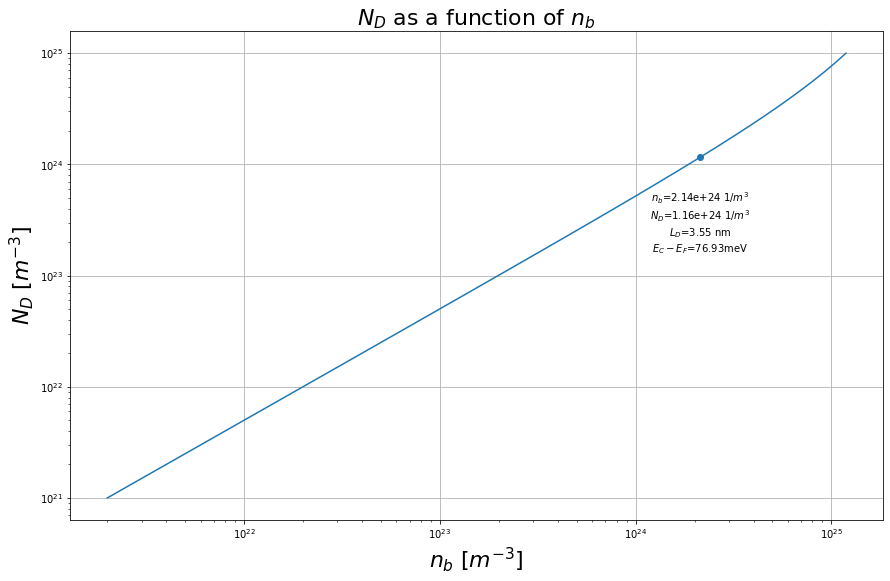

In [9]:
T_C = 300
a = np.array([(Material(T_C, ND_temp).nb, ND_temp) for ND_temp in np.logspace(21, 25)])
fig, axe = subplots(figsize = (((1+5**0.5)/2)*9,9))
x = a[:,0]
y = a[:,1]
axe.plot(x,y)
axe.set_yscale('log')
axe.set_xscale('log')
axe.set_ylabel('$N_D$ $[m^{-3}]$', fontsize=22)
axe.set_xlabel('$n_b$ $[m^{-3}]$',fontsize=22)
axe.grid()
axe.set_title('$N_D$ as a function of $n_b$', fontsize = 22)

# To calcaulte the ND from nb, the numiercal data is interpolated. 
# Generally this way is much simpler than deriving the inverse function to calculate ND from a given nb
ND_from_nb = scipy.interpolate.interp1d(x,y, kind='cubic' )

#Chekcing one value from the Thesis of Julia Rebholz
nb_check = 2.14e24
ND_check = ND_from_nb(nb_check)
mat_check = Material(T_C, ND_check)
LD_check = mat_check.LD
Ec_Ef_eV_check = mat_check.Diff_EF_EC_evolt
axe.scatter(nb_check, ND_check)
axe.text(nb_check,ND_check/2,
         f'$n_b$={nb_check:.2e} $1/m^3$\n$N_D$={ND_check:.2e} $1/m^3$\n$L_D$={LD_check*1e9:.2f} nm\n$E_C-E_F$={Ec_Ef_eV_check*1000:.2f}meV',
         verticalalignment='top', horizontalalignment='center');


#### Free charge carrier conc. using the Boltzmann approximation

Besides the full numerical solution, also the solutions derived from the Boltzmann approximations need to be defined. This will allow to compare the different solutions and check the validity of the different approximations.

In [10]:
def boltzmann_acc(material, E_c):
    return np.exp(-(E_c+material.Diff_EF_EC)/(material.kT*2))

def boltzmann(material,E_c):
    return np.exp(-(E_c+material.Diff_EF_EC)/material.kT)

def densitiy_of_states(material,E, E_c):

    return 4*np.pi*(2*material.MASS_E_EFF)**(3.0/2.0)/CONST.h**3*(E-E_c)**0.5

def n_boltzmann(material,E_c):

    return boltzmann(material,E_c)*material.NC

def n_boltzmann_acc(material,E_c):

    return boltzmann_acc(material,E_c)*material.NC

#### Compare the numerical solution with the approximations

With all the definitions in place, the different solutions can be compared. This will be done be representing the charge carrier concentration $n$ for the different solutions for multiple positions of the conduction band $E_C$ in units of $kT$.

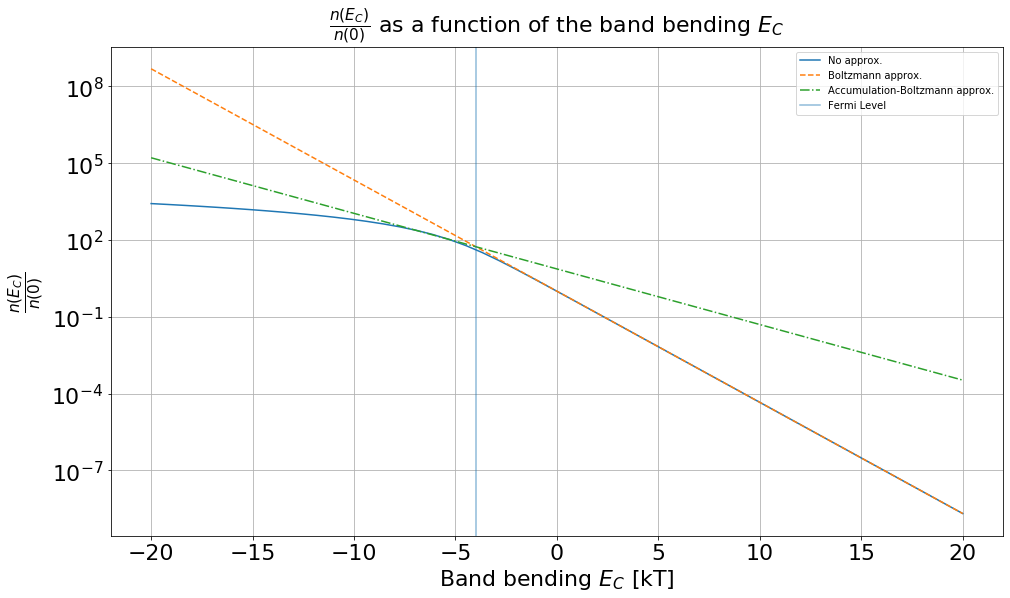

In [11]:
def plot_material_char(mat):
    ns = []
    n_boltzs = []
    n_boltzs_acc = []
    E_c_kts = []
    for i in np.linspace(-20,20):
        E_c = mat.kT_to_J(i)
        E_c_kts.append(i)
        ns.append(mat.n(E_c)[0]/mat.nb)
        n_boltzs.append(n_boltzmann(mat, E_c)/mat.nb)
        n_boltzs_acc.append(n_boltzmann_acc(mat, E_c)/mat.nb)
    
    
    fermi_level_pos_kt = -mat.J_to_kT(mat.Diff_EF_EC)
    
    fig, axe = subplots(1,figsize = (16,9))

    axe.plot(E_c_kts, ns, label='No approx. ')
    axe.plot(E_c_kts, n_boltzs, '--', label='Boltzmann approx.')
    axe.plot(E_c_kts, n_boltzs_acc, '-.', label='Accumulation-Boltzmann approx.')
    axe.set_yscale('log')
    axe.set_title('$\\frac{n(E_C)}{n(0)}$ as a function of the band bending $E_C$', fontsize=22)
    axe.set_xlabel('Band bending $E_C$ [kT]', fontsize=22)
    axe.set_ylabel('$\\frac{n(E_C)}{n(0)}$', fontsize=22)
    axe.axvline(fermi_level_pos_kt, label='Fermi Level', alpha=0.5)
    axe.tick_params(axis='both', which='major', labelsize=22)
    axe.legend()
    axe.grid(b=True)
    return fig 
material = Material(300,1e23)
fig = plot_material_char(material)

The numerical solution and the approximations are inline with each other in their specific regions of $E_C$. The Boltzmann approximation is identical to the numerical solution starting ~3kT above the Fermi energy level. The approximation for the accumulation layer has its validity in a region where an accumulation is present. This was already shown in <cite data-cite=Barsan2011a>Conduction mechanisms in SnO2 based polycrystalline thick film gas sensors exposed to CO and H2 in different oxygen backgrounds</cite>.

### Numerical description of the semiconductor grains
In this section we define a SMOX grain. We approximate the grain as a sphere composed out of a material we previously defined. For one grain, the Poisson equation with spherical symmetry is solved. The transfer of the findings from a material to an actual grain are important for multiple reasons.

On the one side the ratio of the available surface sites to react with the semiconductor and its bulk size play an important role. Very small grains may have relatively high concentration of surface sites but lack of electrons needed for the reaction at the surface. So a grain may get fully depleted which has significant influence on the overall conduction.

On the other side, the conduction path through the grain differers depending on the free charge carrier concentration. Depending on the size of the grain and the charge distribution, the charge current may have its conduction path along the center of the grain, or along the surface.

These effects of the grainsize can only be analyzed, if the transfer from a material to an actual grain is solved.

To solve the Poisson equation, we will need to supply the solver with the initial values. As described, two values need to be supplied. One is the surface potential. This value can experimentally be measured with the Kelvin Probe method.
The second start parameter, which needs to be supplied is the slope of the potential at the surface. With these two parameters, the solver iterates from the starting condition stepwise though the grain and calculates for each step new values based on the previous iteration.

This "inital value problem" is solved with the scipy tool solve_ivp.


In [12]:
from scipy.integrate import solve_ivp
class Grain:
    def __init__(self,grainsize_radius,material,rPoints=1000):
        self.R = grainsize_radius
        self.material = material
        self.rs = np.linspace(self.R/1000, self.R, rPoints)
    
  
    def solve_with_values(self,E_init, E_dot_init):
        r_LD = self.rs/self.material.LD
        E_init_kT = self.material.J_to_kT(E_init)
        E_dot_init_kt = self.material.J_to_kT(E_dot_init)

        #the solver should stop, when the slope is zero.
        #This is reasonable since if the slope is zero, this should be the lowest
        #point of the graph so, when we "hit_ground" the solver should stop,
        #to save some computational time
        def hit_ground(t, y):
            #print(y)
            if y[0]:
                if E_init_kT<0:
                    if y[0]>0:
                        return 0
                    if y[0]<E_init_kT:
                        return 0
                else:
                    if y[0]<0:
                        return 0
                    if y[0]>E_init_kT:
                        return 0

            if y[1]:
                if abs(y[1])<0.0001:
                    return 0
            return y[1]
        hit_ground.terminal = True
        

        #see the docstring why I chose the metohd BDF
        data = solve_ivp(self.deriv_E_E_dot,(r_LD[-1],r_LD[0]),  [E_init_kT,E_dot_init_kt],
                         t_eval=r_LD[::-1], events=hit_ground, method = 'BDF')
        
        #since we start the iteration to solve the equation from the outside,
        #the results have to be revered
        
        r = data.t[::-1]
        v = data.y[0][::-1]
        v_dot = data.y[1][::-1]
        
        #sinde we stop the evaluation earlier, when v_dot = 0,
        #the missing elements are fileed up
        missing_elements_count = len(r_LD)-len(r)
        r = np.concatenate((r_LD[:missing_elements_count], r))
        v = np.concatenate((np.ones(missing_elements_count)*v[0],v))
        v_dot = np.concatenate((np.ones(missing_elements_count)*v_dot[0],v_dot))
        
        

        return r,v, v_dot, data


    def deriv_E_E_dot(self,r_, U_U_dot):
        U = U_U_dot[0]
        U_dot = U_U_dot[1]
        E = self.material.kT_to_J(U)
        n = self.material.n(E)
        U_dot_dot = 1-n[0]/self.material.nb -2/r_*U_dot
        return [U_dot, U_dot_dot]



#### Example of differnt grains

In [13]:
#define a grain with a specific material
def create_grain(grainsize, T_C, ND):
    mass_e_eff_factor =0.3
    material = Material(T_C,ND)
    grain = Grain(grainsize_radius=grainsize,material=material)
    return grain

#Check the influence of LD

g = create_grain(100e-9, T_C=300, ND=9e21)
print(g.R/g.material.LD)


g = create_grain(50e-9, T_C=300, ND=9e24*4)
print(g.R/g.material.LD)





2.5852950260293164
45.47592892276805


In the next example a grain is defined with a fixed surface potential. Based on the surface potential and 3 different guesses of the initial slope of the potential, the shape of the conduction bad inside the grain is calculated.




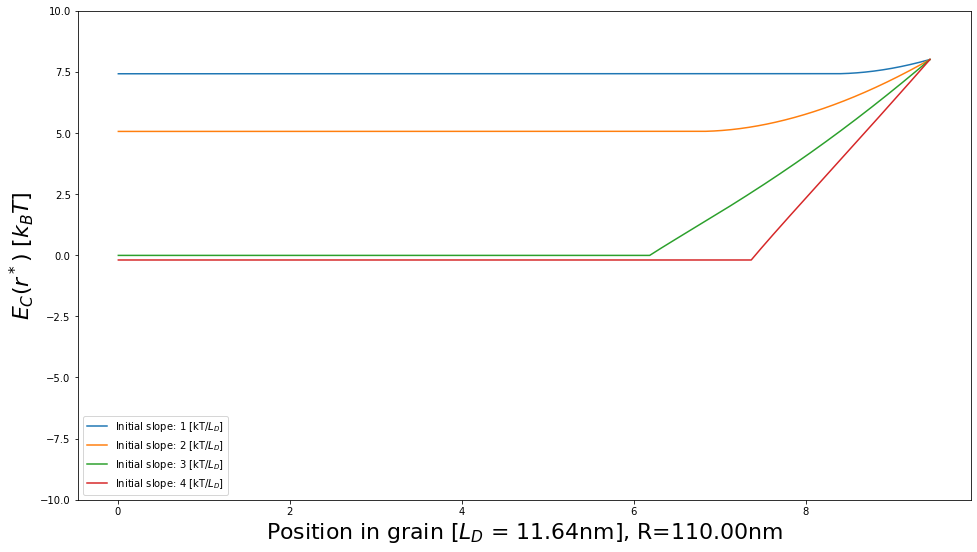

In [14]:

#defining a new grain
T_C = 300
ND = 1e23
grain = create_grain(110e-9, T_C, ND)

#initalize the plot
fig, axe = subplots(figsize = (16,9))
axe.set_ylim(-10,10)

#fix the surface potential to 8kT
E_init_kT = 8
#express the surface potential in J
E_init = grain.material.kT_to_J(E_init_kT)

#for 3 values of the inial slope in units of 1kT/LD
#calculate the conduction band
# In 1LD the potential drops of the factor 1/e in a infite plane
#8/e ~ 3; so 1,2,4 should be fine as a guess
for E_dot_init_kT in [1,2,3,4]:
    #convert to SI units for the numerical calc.
    E_dot_init = grain.material.kT_to_J(E_dot_init_kT)
    
    #solve with the inital values
    r,v, v_dot, data = grain.solve_with_values(E_init, E_dot_init)


    axe.plot(r,v, label=f'Initial slope: {E_dot_init_kT} [kT/$L_D$]')
    axe.set_xlabel
axe.set_ylabel('$E_C(r^*)$ [$k_BT$]', fontsize =22)
axe.set_xlabel(f'Position in grain [$L_D$ = {grain.material.LD*1e9:.2f}nm],
               R={grain.R*1e9:.2f}nm', fontsize =22)
leg = axe.legend()

    

From this graph it is obvious, that the initial slope has a major influence on the result.

Unfortunately this value is not known. On the other side, I can relay on an equation to check my solution. We will use the derived equation (\ref{second_derivative}) from the Poisson equation:

\begin{align}
\frac{d²V^{*}}{dr^{*2}}=1-n^{*}(V^{*})-\frac{2}{r^{*}}\frac{dV^{*}}{dr^{*}}\label{second_derivative}\tag{Surface slope}
\end{align}

This equation can be transformed into following form:

\begin{align}
\intop_{0}^{R}\frac{d²V^{*}}{dr^{*2}}dr^*=\left[\frac{dV^{*}}{dr^{*}}\right]_{0}^{R}=\left.\frac{dV^*}{dr^{*}}\right|_{R}=\\\left.\frac{dV^*}{dr^{*}}\right|_{Surface}=\intop_{0}^{R}1-n^{*}(V^{*})-\frac{2}{r^{*}}\frac{dV^{*}}{dr^{*}}dr^*
\end{align}

With this relation we can check each solution. For each starting condition the solution should also be valid for this equation. The right side will again be evaluated numerically. The expression $n^{*}(V^{*})$ can be calculated for each $V^{*}$ with the function defined in `class material`. From the solver of the differential equation $\frac{dV^*}{dr^{*}}$ is known inside the grain for each $r^*$. Since all the elements of the integral are known, the numerical evaluation is not difficult. Since the elements of the integral in this case are not functions, which can be calculated individually for each point, but rather a list of values, the integration is slightly different.
For the numerical integration of a list of values $y$ corresponding to a set of $x$ values, the `numpy` function `trapz` is used:

> numpy.trapz(y, x=None, dx=1.0, axis=-1)
>
>    Integrate along the given axis using the composite trapezoidal rule.

#### Example usage of `np.trapz`

Text(3, 0.5, 'Integral: 4.0')

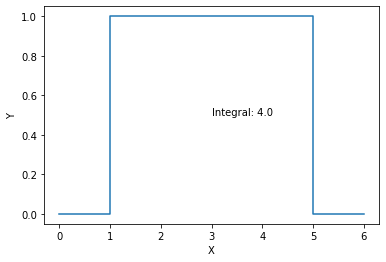

In [15]:
x = [0,1,1,2,3,4,5,5,6]
y = [0,0,1,1,1,1,1,0,0]
fig, axe = subplots()
axe.plot(x,y)
axe.set_xlabel('X')
axe.set_ylabel('Y')
numerical_integral = np.trapz(y,x)
axe.text(3, 0.5, f'Integral: {numerical_integral}')


From the latter relation between the inital slope a the surface and charge distribution on the center ($\ref{second_derivative}$) the following boundary condition for the solution is defined:
\begin{align}
\left.\frac{dV^*}{dr^{*}}\right|_{R^*}-\intop_{0}^{R^*}\left(1-n^{*}(V^{*})-\frac{2}{r^{*}}\frac{dV^{*}}{dr^{*}}\right)dr^* = 0.
\end{align}

Tle left side of the equation can be calculated for multiple values of $\left.\frac{dV^*}{dr^{*}}\right|_{R^*}$. The right value of $\left.\frac{dV^*}{dr^{*}}\right|_{R^*}$ needs to be found to minimize the left side of the equation. 
Definitely similar problems have been done before, Python/SciPy has already a solution for this ready. The tools needed to solve this problems can be found in the `scipy.optimize` package. The function `minimize_scalar` will be used to minimize the left side of the equation by varying the scalar parameter $\left.\frac{dV^*}{dr^{*}}\right|_{R^*}$.

The following line is used to load the required function: `from scipy.optimize import minimize_scalar`

To use this function, a function needs to be defined, which is then minimized by changing the input parameter.
This function, which takes the initial slope as an argument, returns the "error" based on the previous equation. The algorithm should then find the best initial slope parameter to have a valid solution and minimize the "error"

In [16]:
from scipy.optimize import minimize_scalar


def min_vdot(vdot_init, grain, vinit, debug = False):
    #solve the ivp with the given values
    r,v,vdot, data = grain.solve_with_values(grain.material.kT_to_J(vinit),
                                             grain.material.kT_to_J(vdot_init))

    
    #for each point of the solution the element in the integral is calculated
    integrand = [(1-grain.material.n(grain.material.kT_to_J(v_i))[0]/grain.material.nb)-2/r_i*vdot_i for r_i,
                 v_i, vdot_i in zip(r, v, vdot)]
    
    #the integral is numerically calculated
    dV = np.trapz(y=integrand,x=r)
    
    #The integral should be the same as the slope at the surface, 
    #the difference is the error to be minimized
    res = abs((dV-vdot[-1]))
    
    if debug:
        print(vdot_init, dV, vinit, res)
    return res

def find_best_E_dot_init(E_init_kT, grain,debug = False, bounds = None):
    #if bounds are given as a hint for the minimize algorithm, then the method='Bounded' can be used
    #In this case the algorithm will search in the biven interval
    if bounds:
        res = minimize_scalar(min_vdot,args=(grain, E_init_kT, debug), method = 'Bounded',
                              bounds = bounds)
    else:
        res = minimize_scalar(min_vdot,args=(grain, E_init_kT, debug))
    return res



So the previous example with randomly guessed initial values can be extended with a better guess.

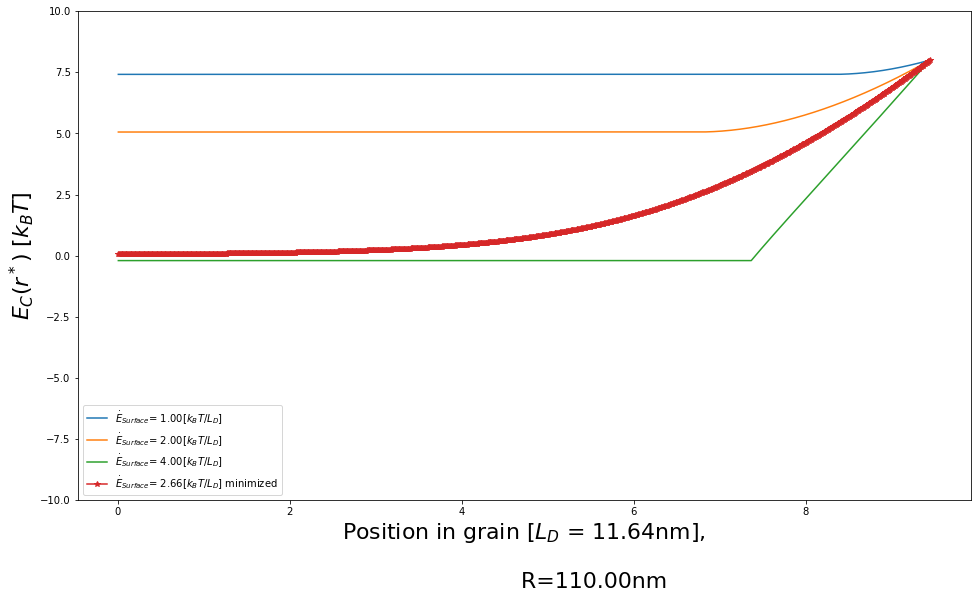

In [17]:
#grain = Grain(100e-9,material)


T_C = 300
ND = 1e23
grain = create_grain(110e-9, T_C, ND)

fig, axe = subplots(figsize = (16,9))
axe.set_ylim(-10,10)

E_init_kT = 8
E_init = grain.material.kT_to_J(E_init_kT)

for E_dot_init_kT in [1,2,4]:
    E_dot_init = grain.material.kT_to_J(E_dot_init_kT)
    r,v, v_dot, data = grain.solve_with_values(E_init, E_dot_init)
    axe.plot(r,v, label='$\dotE_{Surface}$'+ f'= {E_dot_init_kT:.2f}[$k_BT$/$L_D$]')

    
#Now we will try to find the best inital slope to solve the equation
res = find_best_E_dot_init(E_init_kT, grain)

E_dot_init_kT = res.x
E_dot_init = grain.material.kT_to_J(E_dot_init_kT)
r,v, v_dot, data = grain.solve_with_values(E_init, E_dot_init)
axe.plot(r,v, '-*', label='$\dotE_{Surface}$'+ f'= {E_dot_init_kT:.2f}[$k_BT$/$L_D$] minimized')
    
axe.set_ylabel('$E_C(r^*)$ [$k_BT$]', fontsize =22)
axe.set_xlabel(f"""Position in grain [$L_D$ = {grain.material.LD*1e9:.2f}nm],\n
                    R={grain.R*1e9:.2f}nm""", fontsize =22)
axe.legend();

### Additional relevant paramters
From the above solution some additional results can be calculated without too much of computational effort. For instance the total number of free charge carries inside the grain left. From the charge distribution inside the grain, a simple integral of the values over the volume of the sphere will reveal this value. The difference of this value to the value in the flat band situation is then be the number of charges trapped at the surface $N^-_{Surface}$.
Additionally from the concentration of defects $N_D$ inside the grain, it is possible to calculate the amount of defects resulting in the $1\mathring{A} = 0.1 nm$ if they would equally project on the surface.

In [18]:
def calc_sum_of_charges(grain, r, v):
    ser = {}
    #Geometric properties
    ser['R'] = grain.R
    grain_volume = 4.0/3.0*pi*(grain.R**3)
    grain_surface = 4.0*pi*(grain.R**2)
    ser['grain_vol'] = grain_volume
    ser['grain_surface'] = grain_surface
    
    # calcualte the acctual free charge carrier conc. from the position inside the grain
    n = [grain.material.n(v_J)[0] for v_J in grain.material.kT_to_J(v)]
    ser['n'] = n
    
    # charges in grain and at the surface
    all_c_at_flatband = 4.0/3.0*pi*(grain.R**3)*grain.material.n(0)[0]
    charges_at_surface = all_c_at_flatband-np.trapz(n,(r*grain.material.LD)**3*4/3*pi)
    ND_projection_surf = grain.material.ND*((grain.R+0.1*1e-9)**3 - grain.R**3)*4/3*pi
    
    ser['all_c_at_flatband'] = all_c_at_flatband
    ser['charges_trapped_at_surface'] = charges_at_surface
    ser['surface_vacancies_projection'] = ND_projection_surf

    

    
    
    #additional paramters
    ser['temp'] = grain.material.T_C
    ser['mass_eff'] = grain.material.MASS_E_EFF
    ser['ND'] = grain.material.ND
    ser['EPSILON'] = grain.material.EPSILON
    ser['nb'] = grain.material.nb
    ser['E_Fermi_kT'] = -grain.material.J_to_kT(grain.material.Diff_EF_EC)

    return ser

calc_charges = calc_sum_of_charges(grain, r, v)


display(pd.DataFrame(pd.Series(calc_charges)))

,0
R,1.1e-07
grain_vol,5.57528e-21
grain_surface,1.52053e-13
n,"[1.8453235121620025e+23, 1.8453235121620025e+2..."
all_c_at_flatband,1106.69
charges_trapped_at_surface,937.262
surface_vacancies_projection,1.52191
temp,300
mass_eff,2.73282e-31
ND,1e+23


## Putting the pieces together
With a description of the semiconductor itself by the class `material` and the semiconductor grain by the class `grain` the screening of multiple parameters can start.
In the following combinations will be screened:

- 4 different defect concnetrations $N_D$: [$10^{21}$, $10^{22}$, $10^{23}$, $10^{24}$] [$\frac{1}{m³}$]
- Temperature of the meraterial: 300°C.
- Surface potentials [-20,20] $k_BT$
- Grain radii ($R$): 6.25nm, 12.5nm, 25nm, 50nm and 100nm.

Those results will lead in a second step to an understanding of the relation between surface reaction, resistance change and grain size. But for now, data for further analysis will be generated. This part has a high computational effort. Since the solutions of each combination do not depend on each other, this job can be parallelized easily.

As we would like to do the time consuming calculations (finding the right start conditions) only once, we will save the correct solution in a `DataFrame`. As mentioned earlier, a `DataFrame` is a data structure to organize information similar to Excel Worksheets. As in "Excel Worksheets" data can be stored, accessed and manipulated. A `Dataframe` is a part of the `pandas` Python library. To shorten the command for pandas I will import it and add an alias to it. The following code part import `pandas` and creates a `Dataframe`, where all our results will be stored.

In [19]:
dF_calc = pd.DataFrame()

Next, we need to create the numerical representation of the material. Here we define helper functions, which are needed for the parallelization of the jobs.

In [20]:
def solve_grain_for_E_init_kT(E_init_kT,grain, debug = False, bounds = None):
    res = find_best_E_dot_init(E_init_kT, grain,debug = debug, bounds = bounds)

    ser_temp = pd.Series(dtype=float)
    ser_temp['Einit_kT'] = E_init_kT
    ser_temp['E_dot_init_kT'] = res.x
    ser_temp['res'] = res.fun

    E_init_J = grain.material.kT_to_J(E_init_kT)
    E_dot__init_J = grain.material.kT_to_J(res.x)
    r,v,vdot, data = grain.solve_with_values(E_init_J,E_dot__init_J)

    ser_temp['v'] = v
    ser_temp['v_dot'] = vdot
    ser_temp['r'] = r

    derived_values_dict = calc_sum_of_charges(grain, r, v)
    ser_temp = ser_temp.append(pd.Series(derived_values_dict))
    return ser_temp


def calcualte_conduction_band(grain):
    dF_calc_temp = pd.DataFrame()
    #for E_init_kT in [-8,0,8]:
    #for E_init_kT in [-8,-4,-2,-1,0,1,2,4,8]:
    for E_init_kT in list(list(range(-20,21))):      
        ser_temp = solve_grain_for_E_init_kT(E_init_kT,grain)    
        dF_calc_temp = dF_calc_temp.append(ser_temp, ignore_index=True)
    return dF_calc_temp


def calc_solution_by_parameters(T_C, ND, grainsize):
    grain = create_grain(grainsize, ND=ND, T_C=T_C)
    dF_calc_temp = calcualte_conduction_band(grain)
    return dF_calc_temp

### Defining the parameters to be screen
Then a list is created including all the paramters combinbations. In Python a fast way to achieve this is `itertools.product`. This function will gerate a list of all combination of its arguments.

In [21]:
import itertools
import pprint

Ts = [300]
ND_ref = 1e21
NDs = [ND_ref, ND_ref*1e1, ND_ref*1e2, ND_ref*1e3]
Rs = [6.25e-9, 12.5e-9, 25e-9, 50e-9, 100e-9]

combinations = list(itertools.product(Ts,NDs,Rs))
pprint.pprint(combinations)

[(300, 1e+21, 6.25e-09),
 (300, 1e+21, 1.25e-08),
 (300, 1e+21, 2.5e-08),
 (300, 1e+21, 5e-08),
 (300, 1e+21, 1e-07),
 (300, 1e+22, 6.25e-09),
 (300, 1e+22, 1.25e-08),
 (300, 1e+22, 2.5e-08),
 (300, 1e+22, 5e-08),
 (300, 1e+22, 1e-07),
 (300, 1e+23, 6.25e-09),
 (300, 1e+23, 1.25e-08),
 (300, 1e+23, 2.5e-08),
 (300, 1e+23, 5e-08),
 (300, 1e+23, 1e-07),
 (300, 1e+24, 6.25e-09),
 (300, 1e+24, 1.25e-08),
 (300, 1e+24, 2.5e-08),
 (300, 1e+24, 5e-08),
 (300, 1e+24, 1e-07)]


### Starting a parallelized calculation
In the next cell block the actual calculation will take place. The first line: `from multiprocessing import Pool`, adds multi processing capabilities to the programming environment. The imported class `Pool` represents a pool of worker processes, which are used to execute the task in parallel. In line 11 `Pool(8)` initializes a pool with 8 parallel processes. On this pool the function `starmap` takes care of executing a certain function with specific arguments. In this case the function will be `calc_solution_by_parameters` and the 'parameters' will be the list of combinations we just created in the cell above.
Additionally the time is calculated for the full process. The output shows, that the total calculation time is around 1h. This was performed on a regular desktop PC. This examples shows, that performing scientific numerical calculations do not need necessarily special dedicated hardware to get started. Regarding the low workload most computer have in average over a day, most modern PCs should be very well suited for such a task.

In [43]:
#using multiple processors of the system to calculate the solutions in parallel.
from multiprocessing import Pool
import time

#save the start timestamp
start_calc_time = time.time()

#use 8 cores of the cpus
#starmap takes over the work of running the tasks
#The pool of 8 cores is used to distribute the work
with Pool(8) as p:
    all_res_list = p.starmap(calc_solution_by_parameters, combinations)
    pass

#All solution is are returned in a list, which needs then to be combined again
dF_calc = pd.concat(all_res_list)
dF_calc.index = range(len(dF_calc))

calc_duration_sec = time.time()-start_calc_time
print(f'Calc duration: {calc_duration_sec/60:.1f}min.')

### Export/Import data
The date will be saved for later use and to avoid a re-calculation.
It is helpful to directly re-import the data to see if any mistakes have happened while saving the date.


In [38]:
dF_calc.to_hdf('results.h5', 'raw', mode='w')


In [66]:
pd.set_option('display.max_columns', 6)
pd.set_option('display.precision', 2)
pd.set_option('display.max_colwidth', 12)

calc_dF_all = pd.read_hdf('results.h5', 'raw')
calc_dF_all.head()

,EPSILON,E_Fermi_kT,E_dot_init_kT,...,temp,v,v_dot
0,9.86,-8.6,-1028.08,...,300.0,[-9.3515...,[-0.0582...
1,9.86,-8.6,-915.45,...,300.0,[-9.2795...,[-0.1319...
2,9.86,-8.6,-806.08,...,300.0,[-9.2049...,[-0.1626...
3,9.86,-8.6,-5.01,...,300.0,"[-17.0, ...",[-5.0107...
4,9.86,-8.6,-4.16,...,300.0,"[-16.0, ...",[-4.1571...


With all the results now in single DataFrame, we will analyze and represent individual rows of the full set to gain some insides about the data. Since the DataFrame only saves the resulting numbers, but not the corresponding classes `Grain` and `Material`, we need to create the numerical `Grain` again from this numbers. A helper function, which takes one or multiple rows and returns the corresponding numerical `Grain` class, will be very handy an is constructed in the next cell.

In [67]:
def create_grain_from_data(dF):
    if type(dF)==pd.Series:
        dF = pd.DataFrame([dF])
        
    if len(dF['temp'].unique())==1:
        T_C = dF['temp'].unique()[0]
    else:
        raise Exception('Multiple paramters for one grain are invalid.')
    
    if len(dF['ND'].unique())==1:
        ND = dF['ND'].unique()[0]
    else:
        raise Exception('Multiple paramters for one grain are invalid.')
    
    if len(dF['mass_eff'].unique())==1:
        mass_e_eff_factor = dF['mass_eff'].unique()[0]/CONST.MASS_E 
    else:
        raise Exception('Multiple paramters for one grain are invalid.')
    
    if len(dF['R'].unique())==1:
        grainsize_radius = dF['R'].unique()[0]
    else:
        raise Exception('Multiple paramters for one grain are invalid.')
        

    

    material = Material(T_C,ND)
    grain = Grain(grainsize_radius=grainsize_radius,material=material)
    
    return grain


### Refine algorithm

#### Visualize incorrectly found minima
Sometimes the minimization of the function does not work was expected. In most cases the searching algorithm may find a "just" a local minimum and miss the global one. Generally this problem could be solved by suppling additional hints to the minimization algorithm, where to look for the minimum. To do so we could first find the the points, where the minimization "error" is still too high and the recalculate those points with additional hints.

Here again, a graphical representation is helpful for a better understanding. Since we have solution for multiple doping levels ($N_D$) and multiple grain radii ($R$), I will represent each combination individually. The Pandas `groupby` function allows to split `DataFrames` temporally by a given group label. By grouping all the results by the label-tuple ($N_D$, $R$), Pandas will do the work and we can represent the individual result separately.
Since the data holds also a column named `res` with the final "error" of the minimization, we can distinguish good and bad results easily.




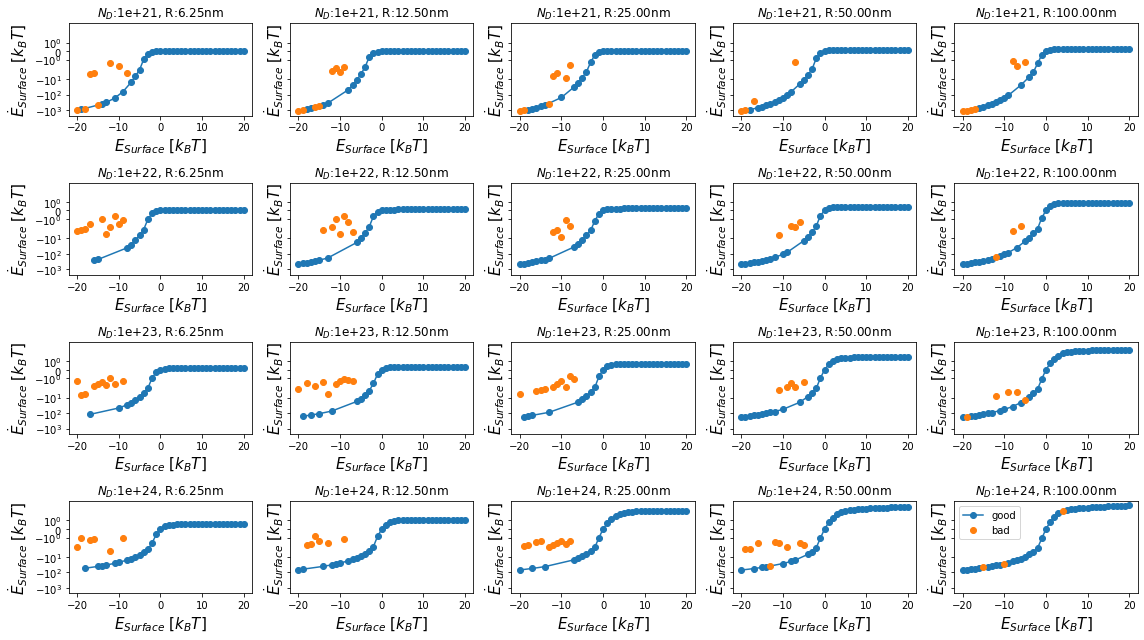

In [49]:
gs = calc_dF_all.groupby(['ND','R'])
fig, axe = subplots(len(gs)//5,5, figsize=(16,9), sharey=True)

calc_dF_all['E_dot_init_kT_estimation'] = None
for ax_i, ((ND,R), g) in enumerate(gs):
    #select the axe
    axe = fig.axes[ax_i]
    
    #selecting on ly the good results by using the 'res' field
    g_good = g[g['res']<2]
    
    #the bad ones are the complent of the good ones; droping the good
    #ones from all results leaves the bad ones back
    g_bad = g.drop(g_good.index)
    
    #plotting the good and bad results
    axe.plot(g_good['Einit_kT'], g_good['E_dot_init_kT'],'o-', label='good')
    axe.plot(g_bad['Einit_kT'], g_bad['E_dot_init_kT'],'o', label='bad')
    
    #some plotting sugar
    axe.set_yscale('symlog')
    axe.set_title(f'$N_D$:{ND}, R:{R*1e9:.2f}nm')
    axe.set_xlabel(r'$E_{Surface}$ [$k_BT$]', fontsize = 15)
    axe.set_ylabel(r'$\dot{E}_{Surface}$ [$k_BT$]', fontsize = 15)
axe.legend()
fig.tight_layout()
    

#### Interpolate better solutions of incorrectly found minimum
The good results can be distinguished well from the bad ones, where the algorithm failed. Additionally a trained eye is able to estimate the interval, where the correct solution should lye. As humans can, so does Python. For this problem a the good solutions are used to estimate the correct solution of the failed points. In the following plot, this is done.
Since we will need the predicted result as a starting point for a second minimization, we will add this value to the DataFrame holding all solutions and naming it appropriately .
Since this function might become very handy to check the solution, we will wrap it into a function and reuse it later.

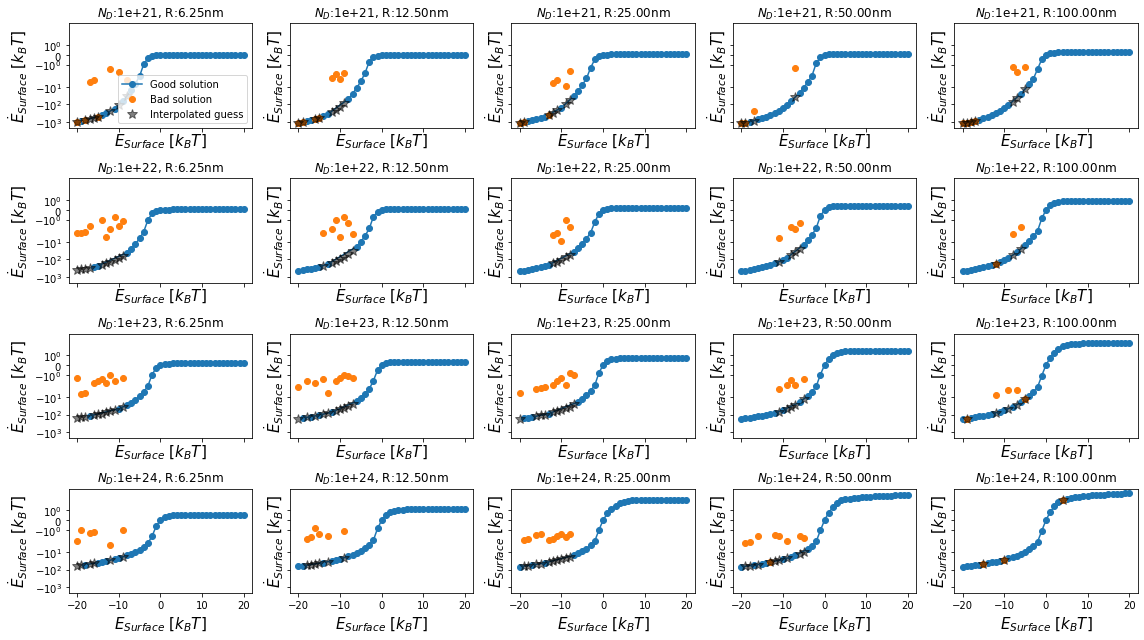

In [50]:
from scipy.interpolate import interp1d
def check_solutions(calc_dF_all):
    gs = calc_dF_all.groupby(['ND','R'])
    fig, axes = subplots(len(gs)//5,5, figsize=(16,9), sharex=True, sharey=True)

    calc_dF_all['E_dot_init_kT_estimation'] = None
    for ax_i, ((ND,R), g) in enumerate(gs):
        axe = fig.axes[ax_i]
        g_good = g[g['res']<2]
        g_bad = g.drop(g_good.index)
        axe.plot(g_good['Einit_kT'], g_good['E_dot_init_kT'],'o-', label='Good solution')
        axe.plot(g_bad['Einit_kT'], g_bad['E_dot_init_kT'],'o', label='Bad solution')
        axe.set_yscale('symlog')
        axe.set_title(f'$N_D$:{ND}, R:{R*1e9:.2f}nm')
        axe.set_xlabel(r'$E_{Surface}$ [$k_BT$]', fontsize =15)
        axe.set_ylabel(r'$\dot{E}_{Surface}$ [$k_BT$]', fontsize =15)

        x = g_good['Einit_kT']
        y = g_good['E_dot_init_kT']
        w = g_good['res']
        
        #create the interpolation
        interp = interp1d(x,y,kind='cubic',bounds_error=False, fill_value='extrapolate')

        g_bad_correct_y  = interp(g_bad['Einit_kT'])
        axe.plot(g_bad['Einit_kT'], g_bad_correct_y, '*k',
                 markersize=10, alpha=0.5, label='Interpolated guess')
        
        
        calc_dF_all.loc[g_bad.index, 'E_dot_init_kT_estimation'] = g_bad_correct_y
        

    axe = fig.axes[0]
    axe.legend(*axes[0][0].get_legend_handles_labels())
    fig.tight_layout()
check_solutions(calc_dF_all)

### Recalculating the incorrect minima (with boundaries)
By using the estimated correct values of the slope at the surface of the grain, the function `find_best_E_dot_init` for the bad solutions is repeated. Since the good solutions will have no value for the "estimated correct value", we will use this fact to select the rows in the DataFrame which need to be recalculated.

In [27]:
def recalculate_by_index(index):
    ser_temp = calc_dF_all.loc[index].copy()
    grain = create_grain_from_data(ser_temp)
    E_init_kT = ser_temp['Einit_kT']
    
    
    
    #This is the estimated value from the interpolation of the good solutions
    estim = ser_temp['E_dot_init_kT_estimation']
    
    #Since the correct solution sould be in proximity of this solution, an interval
    #is created from this value (here +-10%)
    bounds = sorted((estim*0.9, estim*1.1))
    
    ser_new = solve_grain_for_E_init_kT(E_init_kT,grain, debug = False, bounds = bounds)
    ser_new.name = ser_temp.name
    ser_temp.update(ser_new)
    return ser_temp
    
#calc_dF_all.loc[ser_temp.name] = ser_new

In [28]:
index_to_recalc = list(calc_dF_all[calc_dF_all['res']>2].dropna(subset=['E_dot_init_kT_estimation']).index)
from multiprocessing import Pool

if __name__ == '__main__':
    p = Pool(8)
    new_sers = p.map(recalculate_by_index, index_to_recalc)

And finally the old solutions in the DataFrame are replaced with the (hopefully) better ones and saved again in a file.

In [29]:
for s in new_sers:
    calc_dF_all.loc[s.name] = s

calc_dF_all.to_hdf('results.h5', 'corr', mode='a')

### Checking the corrected solutions

Now the solution should all be available and a simple representation should reveal some insight about its quality.

71
The maximal "error" of the minimization is :53.768085981645115


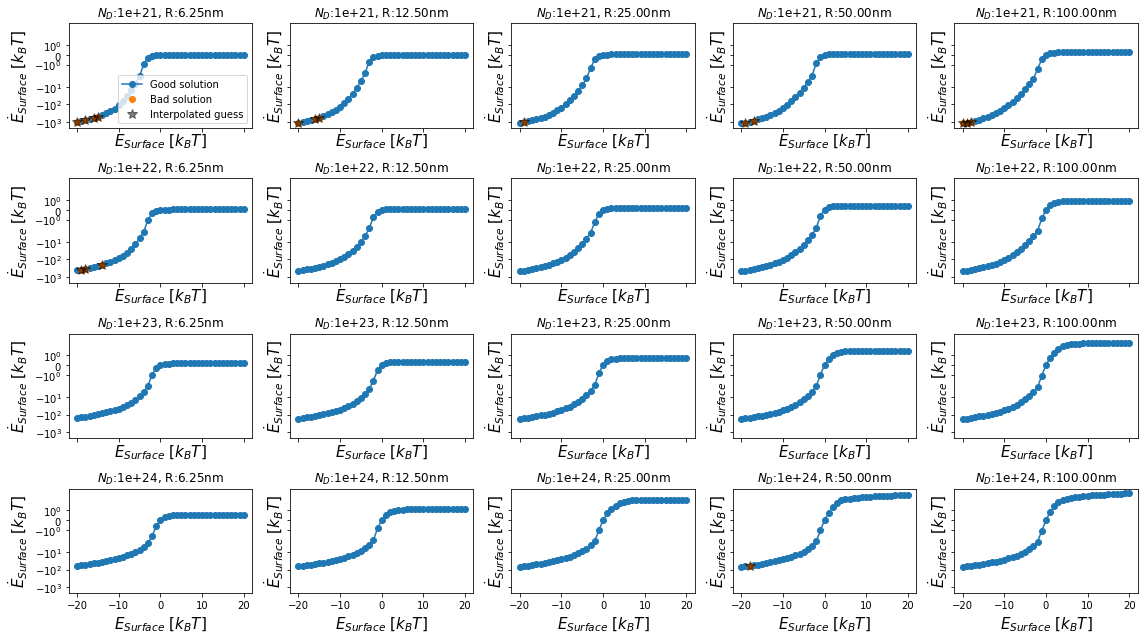

In [51]:
calc_dF_all = pd.read_hdf('results.h5', 'corr')
print(len(calc_dF_all[calc_dF_all['res']>1]))
check_solutions(calc_dF_all)
print(f'The maximal "error" of the minimization is :{calc_dF_all["res"].max()}')

## Shape of the potential drop inside the grain
Since all data is available now, the shape of the conduction band inside the grain can be represented for the different combinations of parameters.

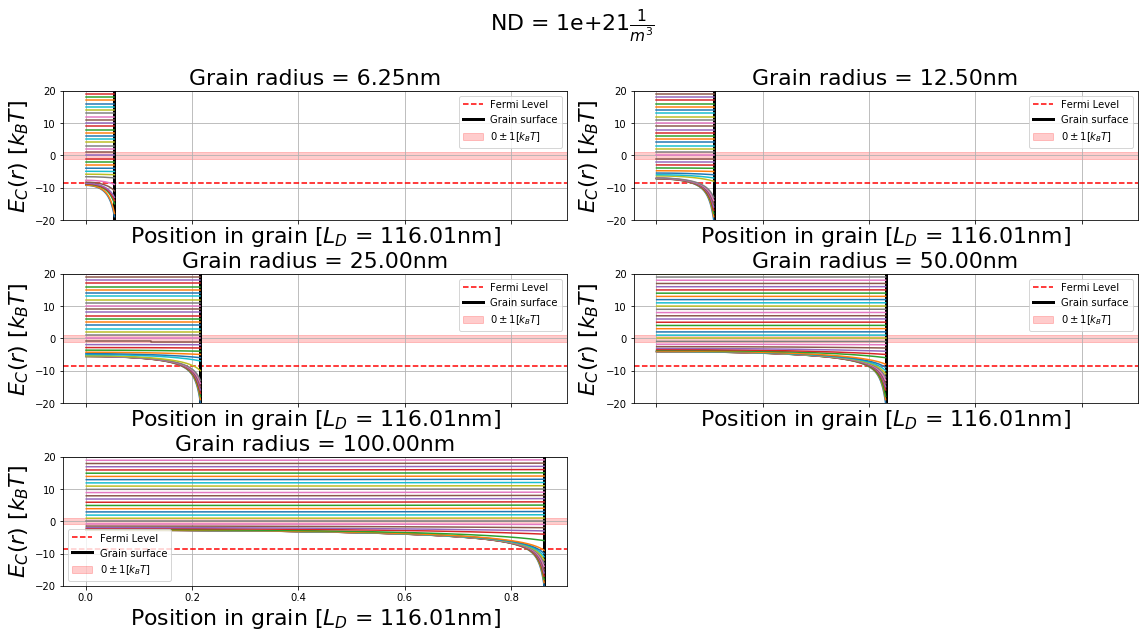

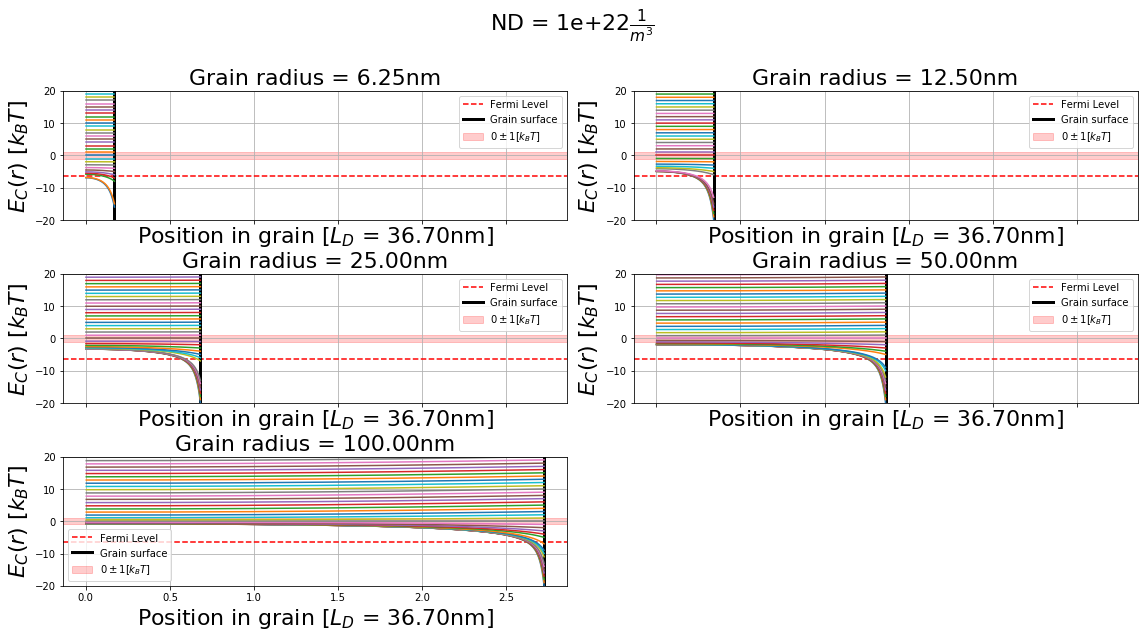

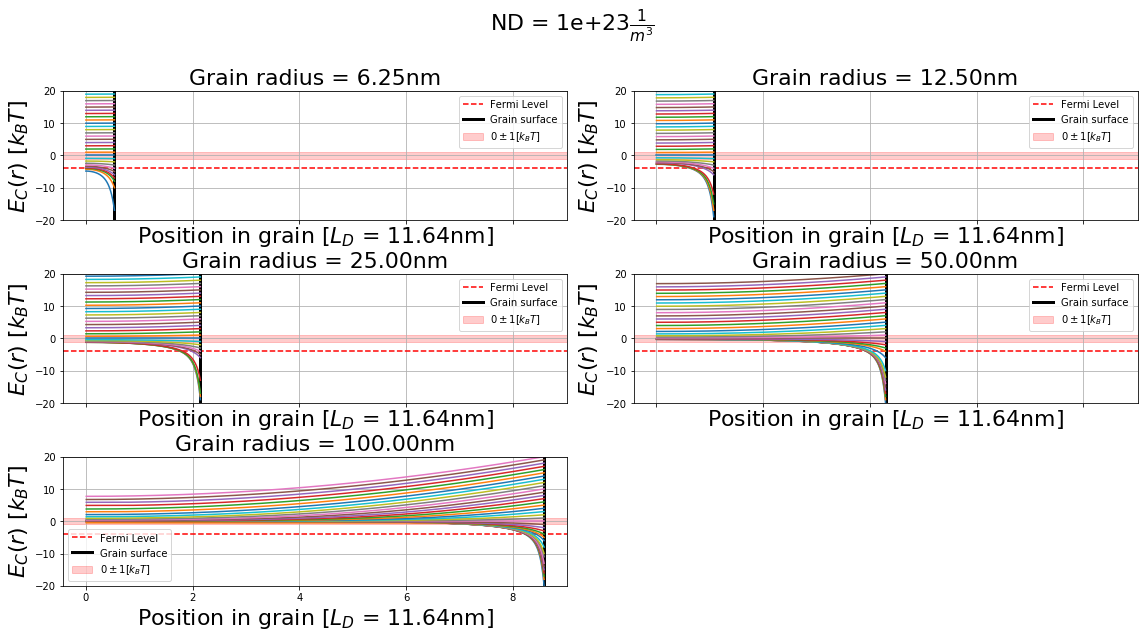

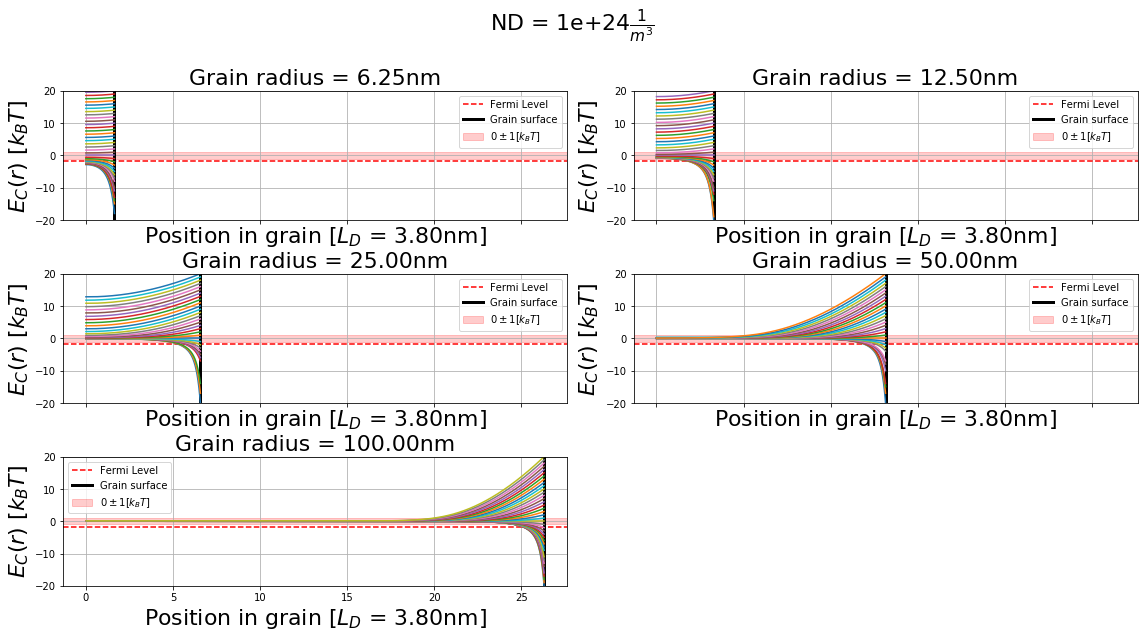

In [74]:
for ND, calc_dF in calc_dF_all.groupby('ND'):
    fig, axes= subplots(3,2,figsize = (16,9), sharex=True)
    
    fig.suptitle(f'ND = {ND}'+ r'$\frac{1}{m^3}$', fontsize = 22)

    
    for ax_i, (R, calc_dF_grainsize) in enumerate(calc_dF.groupby('R')):
        axe = fig.axes[ax_i]
        axe.set_ylim(-20,20)

        grain = create_grain_from_data(calc_dF_grainsize)
        

        axe.axhline(-grain.material.J_to_kT(grain.material.Diff_EF_EC),
                    linestyle='--',color='r', label='Fermi Level')
        
        axe.axvline(grain.R/grain.material.LD,
                    linewidth=3, color='k', label='Grain surface')
        
        
        
        axe.axhspan(-1,+1,color='r', alpha=0.2, label='$0\pm 1 [k_BT]$')

        for vinit, ser_temp in calc_dF_grainsize.iterrows():
            
            #discarde bad solutions from the plot
            if ser_temp['res']>5:
                continue
                
            r = ser_temp['r']
            v = ser_temp['v']
            vdot = ser_temp['v_dot']

            axe.set_title(f'Grain radius = {grain.R*1e9:.2f}nm', fontsize=22)

            axe.plot(r,v, '-', label = "")
            axe.set_ylabel('$E_C(r)$ [$k_BT$]', fontsize =22)
            axe.set_xlabel(f'Position in grain [$L_D$ = {grain.material.LD*1e9:.2f}nm]',
                           fontsize =22)
        axe.legend()
        axe.grid(b=True)
    
    fig.axes[-1].set_axis_off()
    fig.tight_layout()
    fig.subplots_adjust(top=.85)
    close()
    display(fig)
    for i in range(5):print()

This graph shows how a surface potential is shielded by the remaining ionized donors. In the case of on deletion layer ( $E_{C_{Surface}}>0 )$), the total number of charges shielding the surface potential is rather small compared to the amount of charges in an accumulation layer ( $E_{C_{Surface}}<0 )$). The result of such an asymmetry is visible in the graph. The width of the accumulation layer is by far smaller then the width of the depleted are.

# Summary
In this notebook the flowowing steps have been accomplished:

- numerically calculate the charge density in a semiconductor
- solve the Poisson equation for spherical grains
- Calculate the solutions for multiple grain sizes and surface potentials

Those calculations have been derived with a standard set of Python tools. By using mainly the `numpy`, `scipy`, `matplotlib` and `pandas` these results have been achieved.

To avoid a to large blocks of information in one notebook I like to introduce a breakpoint here. At such breakpoints it is helpful to save all the relevant gathered data in a `DataFrame`, save it to the filesystem, and pick it up again in a fresh notebook. This keeps each notebooks close to one topic and and introduces directly structure in the data.

In the next notebook this calculated date will be used derive the total resistance of a grain under different conditions. The anisotropic charge carrier distribution inside the grain has a mayor influence on the total resistance. For two extreme cases, the conduction path inside the grain  differs a lot. Those cases are:

1. Accumulation layer at the surface
2. Depletion layer at the surface

In the case of 1., the current will most likely run along the highly conductive surface of the grain. In the second case, the current will need to overcome a highly resistive surface layer and then propagate through the inside of the relatively low resistive bulk of the grain.

Since all information to numerically derive the effects are now pre-calcualted, the next notebook will start at this point and continue to calcualte the total resistance.[Non-PDF readers, could use this link to guide them to the next notebook.](./3-Resistance-sensor.ipynb)


# Bibliography section

%%latex
\bibliographystyle{alphadin}
\bibliography{ipython}

%%latex
\newpage
This page is intentionally left blank.